# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 13-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari


### <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase
---------------------------

# <font color='blue'>PART 1: DATA UNDERSTANDING AND CLEANING</font>

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no infromation (all entries are null or same)
4. Conver dates to meaningful number of days
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Outlier Treatment
8. Write data into a clean data file. This will be used to create master-df for analysis

#### <font color='red'>TODO: Compute Loss of data at each cleaning step</font>

In [16]:
# Import required libraries
import numpy as np
import pandas as pd

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom = pd.read_csv('E:\IIIT Bangalore AIML\Group Assignment 2\\telecom_churn_data.csv', low_memory=False)

In [17]:
# Understand the properties of loaded dataframe
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


## Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [18]:
# covert date columns to python datetime format
date_columns = ["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", 
 "date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8", 
 "date_of_last_rech_data_6", "date_of_last_rech_data_7",  "date_of_last_rech_data_8"]
print(telecom[date_columns].head()); print_ln();

# convert to datetime
for col in date_columns:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_columns].head()); print_ln();
print(telecom[date_columns].info()); print_ln();

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                6/21/2014                7/16/2014                 8/8/2014  
1                      NaN                

In [19]:
# Create new days columns, instead of date

telecom["rech_days_left_6"]      = (telecom.last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_data_6"] = (telecom.last_date_of_month_6 - telecom.date_of_last_rech_data_6).astype('timedelta64[D]')
telecom["rech_days_left_7"]      = (telecom.last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_data_7"] = (telecom.last_date_of_month_7 - telecom.date_of_last_rech_data_7).astype('timedelta64[D]')
telecom["rech_days_left_8"]      = (telecom.last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')
telecom["rech_days_left_data_8"] = (telecom.last_date_of_month_8 - telecom.date_of_last_rech_data_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_data_6", "rech_days_left_7", "rech_days_left_data_7", "rech_days_left_8", "rech_days_left_data_8"]
#print(telecom[day_columns].head(10))
print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
rech_days_left_6         98392 non-null float64
rech_days_left_data_6    25153 non-null float64
rech_days_left_7         98232 non-null float64
rech_days_left_data_7    25571 non-null float64
rech_days_left_8         96377 non-null float64
rech_days_left_data_8    26339 non-null float64
dtypes: float64(6)
memory usage: 4.6 MB
None


In [20]:
# Drop all old date columns: add dates columns to drop_column list
drop_columns = date_columns

## Filter high-value customers

In [21]:
# Filter high-value customers
total_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_amt_7"]) / 2.0
amont_70_pc = np.percentile(total_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc); print_ln();

telecom = telecom[total_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape); print_ln();

70 percentile of first two months avg recharge amount:  368.5
-------------------------------------------------------------------------------- 

Dataframe Shape:  (30011, 232)
-------------------------------------------------------------------------------- 



## Tag churners and remove attributes of the churn phase

In [22]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
#telecom["churn"].head(30)

# Columns to be dropped: all columns ending with "_9"
drop_columns += [hdr for hdr in list(telecom) if hdr.endswith("_9")]
print('Total number of columns to drop  = ', len(set(drop_columns))); print_ln()

Total number of columns to drop  =  63
-------------------------------------------------------------------------------- 



## Identify columns that have no varience & Drop

In [23]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_columns += list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_columns += list(telecom_unique_count_is_one.index)

# #Don't drop columns used for caluculations ["last_date_of_month_6", "last_date_of_month_7","last_date_of_month_8"]
# drop_columns -= ["last_date_of_month_6", "last_date_of_month_7","last_date_of_month_8"]

print('Number of columns to drop  = ', len(set(drop_columns)))

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_8    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
std_og_t2c_mou_6        1
last_date_of_month_9    1
std_og_t2c_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_6        1
std_og_t2c_mou_9        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64
-------------------------------------------------------------------------------- 

Number of columns to drop  =  73


In [24]:
# Additional colums to be dropped
# "sep_vbc_3g": this data belongs to fourth month, thus dropping it
# "mobile_number": not dropping as we need member-identification later
#drop_columns += ["mobile_number"]
drop_columns += ["sep_vbc_3g"]

In [25]:
# drop all identified columns
print('Comuns to be droped  = ', set(drop_columns))
print('Number of columns to drop  = ', len(set(drop_columns)))

telecom.drop(set(drop_columns), axis=1, inplace=True)
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5) 

Comuns to be droped  =  {'arpu_3g_9', 'std_ic_t2o_mou_8', 'monthly_3g_9', 'roam_og_mou_9', 'og_others_9', 'sachet_2g_9', 'spl_og_mou_9', 'std_og_t2t_mou_9', 'sep_vbc_3g', 'last_date_of_month_9', 'fb_user_9', 'loc_ic_mou_9', 'std_og_mou_9', 'std_ic_mou_9', 'vol_3g_mb_9', 'loc_og_mou_9', 'loc_ic_t2f_mou_9', 'date_of_last_rech_8', 'arpu_2g_9', 'spl_ic_mou_9', 'last_date_of_month_7', 'std_ic_t2t_mou_9', 'std_og_t2c_mou_9', 'isd_ic_mou_9', 'sachet_3g_9', 'std_og_t2c_mou_7', 'count_rech_3g_9', 'vol_2g_mb_9', 'last_date_of_month_6', 'av_rech_amt_data_9', 'date_of_last_rech_9', 'monthly_2g_9', 'max_rech_amt_9', 'count_rech_2g_9', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_7', 'loc_og_t2t_mou_9', 'onnet_mou_9', 'loc_ic_t2m_mou_9', 'max_rech_data_9', 'date_of_last_rech_7', 'date_of_last_rech_data_7', 'arpu_9', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2o_mou', 'std_ic_t2m_mou_9', 'loc_og_t2o_mou', 'std_ic_t2o_mou_6', 'date_of_last_rech_data_9', 'circle_id', 'std_og_t2f_mou_9', 'date_of_last_rech

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_data_6,rech_days_left_7,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8,churn
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,57.74,19.38,18.74,3.00,nan,6.00,nan,5.00,nan,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,21.03,910.65,122.16,5.00,nan,0.00,0.00,1.00,8.00,0
13,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,...,0.00,0.00,0.00,10.00,nan,9.00,nan,1.00,1.00,0
16,7000875565,430.98,299.87,187.89,50.51,74.01,70.61,296.29,229.74,162.76,...,0.00,2.45,21.89,0.00,nan,0.00,nan,17.00,nan,0
17,7000187447,690.01,18.98,25.50,1185.91,9.28,7.79,61.64,0.00,5.54,...,0.00,0.00,0.00,0.00,nan,1.00,nan,6.00,nan,0


## Missing Value Treatment
- remove row
- replace with average
- replace with median
- replace with mode (applied only to categorical)

In [38]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 159 columns):
mobile_number            30011 non-null int64
arpu_6                   30011 non-null float64
arpu_7                   30011 non-null float64
arpu_8                   30011 non-null float64
onnet_mou_6              29695 non-null float64
onnet_mou_7              29708 non-null float64
onnet_mou_8              29073 non-null float64
offnet_mou_6             29695 non-null float64
offnet_mou_7             29708 non-null float64
offnet_mou_8             29073 non-null float64
roam_ic_mou_6            29695 non-null float64
roam_ic_mou_7            29708 non-null float64
roam_ic_mou_8            29073 non-null float64
roam_og_mou_6            29695 non-null float64
roam_og_mou_7            29708 non-null float64
roam_og_mou_8            29073 non-null float64
loc_og_t2t_mou_6         29695 non-null float64
loc_og_t2t_mou_7         29708 non-null float64
loc_og_t2t_mou_8         290

In [29]:
#Remove rows with onnet_mou_6, onnet_mou_7, onnet_mou_8 blanks
telecom1 = telecom.dropna(axis=0, subset=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'])

print(telecom.shape)
print(telecom1.shape)


(30011, 159)
(28861, 159)


In [39]:
telecom1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Data columns (total 159 columns):
mobile_number            28861 non-null int64
arpu_6                   28861 non-null float64
arpu_7                   28861 non-null float64
arpu_8                   28861 non-null float64
onnet_mou_6              28861 non-null float64
onnet_mou_7              28861 non-null float64
onnet_mou_8              28861 non-null float64
offnet_mou_6             28861 non-null float64
offnet_mou_7             28861 non-null float64
offnet_mou_8             28861 non-null float64
roam_ic_mou_6            28861 non-null float64
roam_ic_mou_7            28861 non-null float64
roam_ic_mou_8            28861 non-null float64
roam_og_mou_6            28861 non-null float64
roam_og_mou_7            28861 non-null float64
roam_og_mou_8            28861 non-null float64
loc_og_t2t_mou_6         28861 non-null float64
loc_og_t2t_mou_7         28861 non-null float64
loc_og_t2t_mou_8         288

In [49]:
# A user may not be using data but only mobile network
telecom1.total_rech_data_6.fillna(value=0, inplace=True)
telecom1.total_rech_data_7.fillna(value=0, inplace=True)
telecom1.total_rech_data_8.fillna(value=0, inplace=True)

telecom1.max_rech_data_6.fillna(value=0, inplace=True)
telecom1.max_rech_data_7.fillna(value=0, inplace=True)
telecom1.max_rech_data_8.fillna(value=0, inplace=True)

telecom1.count_rech_2g_6.fillna(value=0, inplace=True)
telecom1.count_rech_2g_7.fillna(value=0, inplace=True)
telecom1.count_rech_2g_8.fillna(value=0, inplace=True)

telecom1.count_rech_3g_6.fillna(value=0, inplace=True)
telecom1.count_rech_3g_7.fillna(value=0, inplace=True)
telecom1.count_rech_3g_8.fillna(value=0, inplace=True)

telecom1.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom1.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom1.av_rech_amt_data_8.fillna(value=0, inplace=True)

telecom1.arpu_3g_6.fillna(value=0, inplace=True)
telecom1.arpu_3g_7.fillna(value=0, inplace=True)
telecom1.arpu_3g_8.fillna(value=0, inplace=True)

telecom1.arpu_2g_6.fillna(value=0, inplace=True)
telecom1.arpu_2g_7.fillna(value=0, inplace=True)
telecom1.arpu_2g_8.fillna(value=0, inplace=True)


telecom1.night_pck_user_6.fillna(value=0, inplace=True)
telecom1.night_pck_user_7.fillna(value=0, inplace=True)
telecom1.night_pck_user_8.fillna(value=0, inplace=True)


telecom1.rech_days_left_6.fillna(value=0, inplace=True)
telecom1.rech_days_left_7.fillna(value=0, inplace=True)
telecom1.rech_days_left_8.fillna(value=0, inplace=True)

telecom1.rech_days_left_data_6.fillna(value=0, inplace=True)
telecom1.rech_days_left_data_7.fillna(value=0, inplace=True)
telecom1.rech_days_left_data_8.fillna(value=0, inplace=True)


# A user is either fb_user or not
telecom1.fb_user_6.fillna(value=0, inplace=True)
telecom1.fb_user_7.fillna(value=0, inplace=True)
telecom1.fb_user_8.fillna(value=0, inplace=True)

E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [50]:
telecom1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Data columns (total 159 columns):
mobile_number            28861 non-null int64
arpu_6                   28861 non-null float64
arpu_7                   28861 non-null float64
arpu_8                   28861 non-null float64
onnet_mou_6              28861 non-null float64
onnet_mou_7              28861 non-null float64
onnet_mou_8              28861 non-null float64
offnet_mou_6             28861 non-null float64
offnet_mou_7             28861 non-null float64
offnet_mou_8             28861 non-null float64
roam_ic_mou_6            28861 non-null float64
roam_ic_mou_7            28861 non-null float64
roam_ic_mou_8            28861 non-null float64
roam_og_mou_6            28861 non-null float64
roam_og_mou_7            28861 non-null float64
roam_og_mou_8            28861 non-null float64
loc_og_t2t_mou_6         28861 non-null float64
loc_og_t2t_mou_7         28861 non-null float64
loc_og_t2t_mou_8         288

# Oulier Treatment
- Use data distribution to find outliers

In [41]:
#TODO

In [51]:
# write treated telecom file
telecom1.to_csv("E:\IIIT Bangalore AIML\Group Assignment 2\\telecom_churn_data_clean2.csv", sep=',', index=False)

### Correlation Matrix

In [52]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

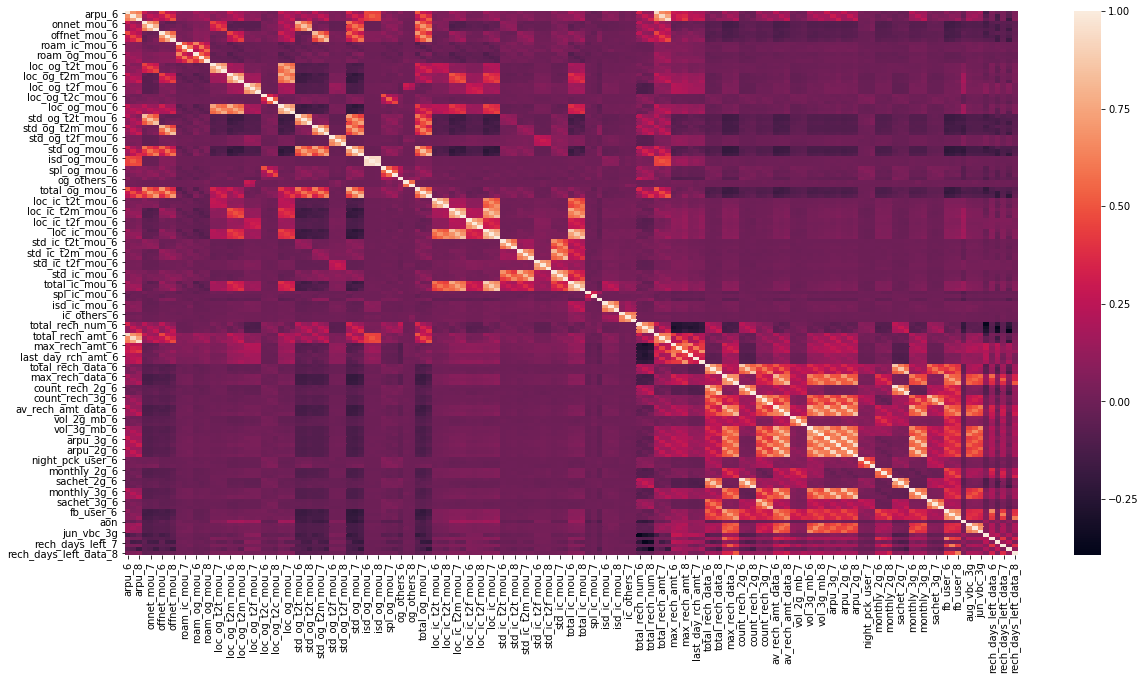

In [54]:
telecom2 = telecom1.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom2.corr())

In [67]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

print(to_drop)

# Drop features 
telecom3 = telecom2.drop(set(to_drop), axis=1)

['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8

In [68]:
telecom3.shape

(28861, 46)

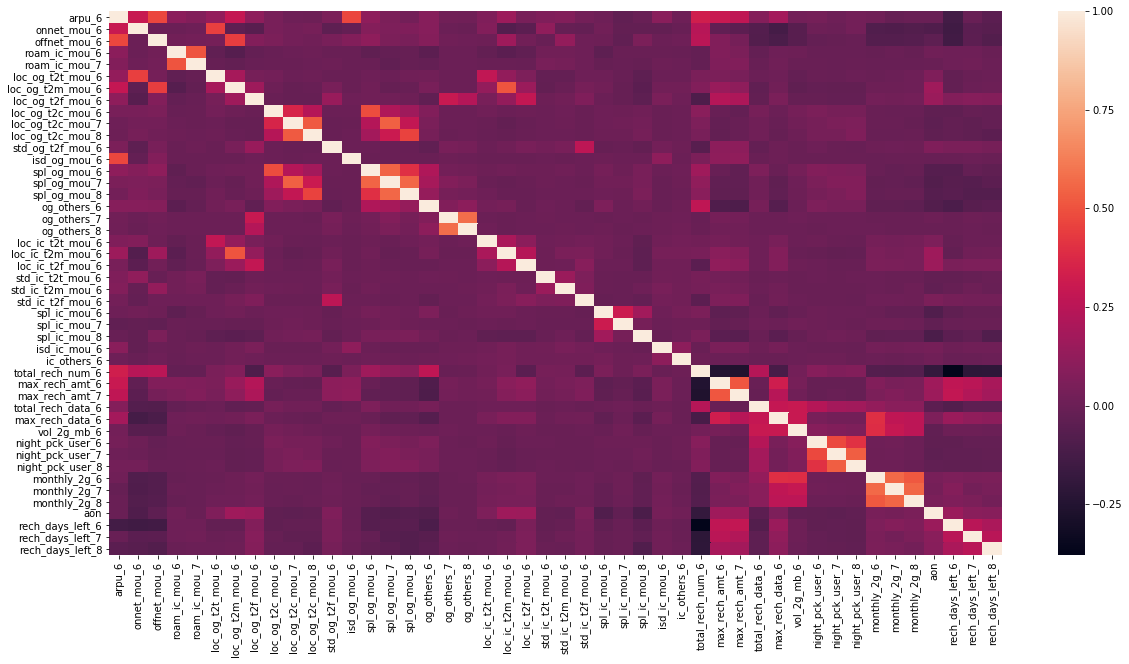

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom3.corr())

# <font color='blue'>SUMMARY: DATA CLEANING</font>

